# 01. 차원축소
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## **개념정리**






---
### **샘플 공간**
---

#### **1차원**



||국어(x)|
|--|--|
|**sample 1**| 100|
|**sample 2**| 45|
|**sample 3**| 60|
|**sample 4**| 85|

* 전체 데이터셋 $D$의 shape?

In [14]:
D1 = np.array([100,45,60,85]).reshape(4,1)
print(D1,D1.shape) 

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)


* 샘플 한개 $x_i$ 의 shape?

In [15]:
for xi in D1:
  print(xi,xi.shape)

[100] (1,)
[45] (1,)
[60] (1,)
[85] (1,)


* $x_i$ 샘플 공간의 차원은?

In [16]:
len(xi)

1

* 샘플공간 시각화

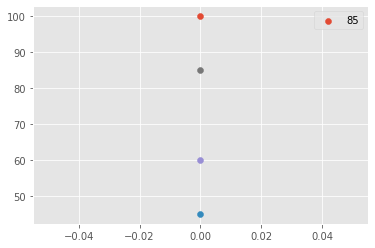

In [17]:
#plt.scatter([0,0,0,0],D1)
for xi in D1:
  plt.scatter(0, xi, label=xi)
plt.legend(xi)
plt.show()

#### **2차원**


||국어(x)|수학(y)|
|--|--|--|
|**sample 1**| 100| 90 | 
|**sample 2**| 45| 50 | 
|**sample 3**| 60| 70 |
|**sample 4**| 85| 80 | 

In [33]:
D2 = np.array([[100,45,60,85],[90,50,70,80]]).swapaxes(0,1)

* 샘플 한개 $x_i$ 의 shape?

In [34]:
for xi in D2:
  print(xi,xi.shape)

[100  90] (2,)
[45 50] (2,)
[60 70] (2,)
[85 80] (2,)


* $x_i$ 샘플 공간의 차원은?

In [35]:
len(xi)

2

* 샘플공간 시각화

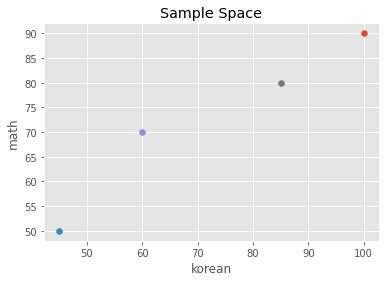

In [44]:
for xi in D2:
  plt.scatter(xi[0], xi[1])
plt.title("Sample Space")
plt.xlabel("korean")
plt.ylabel("math")
plt.show()

#### **3차원**
||국어|수학|영어|
|--|--|--|--|
|**sample 1**| 100| 90 | 90 |
|**sample 2**| 45| 50 | 60 |
|**sample 3**| 60| 70 | 65 |
|**sample 4**| 85| 80 | 90 |

In [32]:
D3 = np.array([[100,45,60,85],[90,50,70,80],[90,60,65,90]]).swapaxes(0,1)

* 샘플 한개 $x_i$ 의 shape?

In [39]:
for xi in D3:
  print(xi,xi.shape)

[100  90  90] (3,)
[45 50 60] (3,)
[60 70 65] (3,)
[85 80 90] (3,)


* $x_i$ 샘플 공간의 차원은?

In [40]:
len(xi)

3

* 샘플공간 시각화

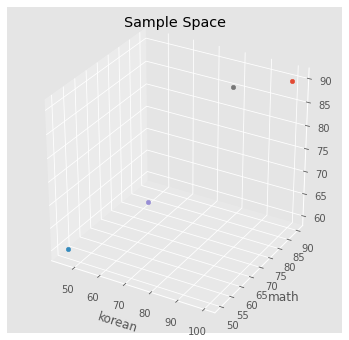

In [43]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection = '3d')
for xi in D3:
  x= xi[0]
  y= xi[1]
  z= xi[2]
  ax.scatter(x,y,z)
plt.title("Sample Space")
plt.xlabel("korean")
plt.ylabel("math")
plt.show()

---
### **차원 축소**
---


#### **모델**

![](https://github.com/yebiny/Lecture-Python-MachinLearning/blob/main/imgs/02-1.png?raw=true)


인풋 행렬 $X$ 에 대해 행렬 $W=(w_1, w_2)$를 곱한후 반환하는 모델을 만들어 봅시다

In [45]:
def reduction_model(X,w1=0,w2=0):
  W=np.array([[w1],[w2]])
  Z = np.matmul(X,W)
  return Z

#### **$W = (0,1)$**

* 데이터 변환

In [49]:
Z = reduction_model(D2,0,1)
print(Z,Z.shape)
print(D2,D2.shape)

[[90]
 [50]
 [70]
 [80]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간 시각화

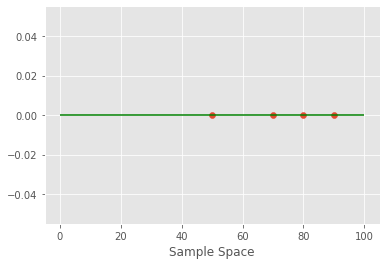

In [53]:
plt.hlines(0,xmin=0,xmax=100,color='g')
plt.xlabel("Sample Space")
plt.scatter(Z,[0,0,0,0])
plt.show()

#### **$W = (1,0)$**

* 차원축소

In [54]:
Z2 = reduction_model(D2,1,0)
print(Z2,Z2.shape)
print(D2,D2.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간 시각화

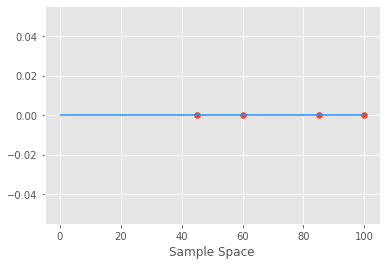

In [56]:
plt.hlines(0,xmin=0,xmax=100,color='dodgerblue')
plt.xlabel("Sample Space")
plt.scatter(Z2,[0,0,0,0])
plt.show()

#### **$W = (1,1)$**

* 차원축소

In [58]:
Z3 = reduction_model(D2,1,0)
print(Z3,Z3.shape)
print(D2,D2.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간 시각화

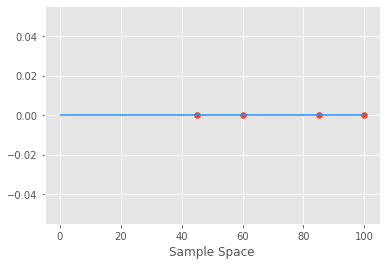

In [59]:
plt.hlines(0,xmin=0,xmax=100,color='dodgerblue')
plt.xlabel("Sample Space")
plt.scatter(Z3,[0,0,0,0])
plt.show()

---
### **투영(Projection)**
---

* 시각화

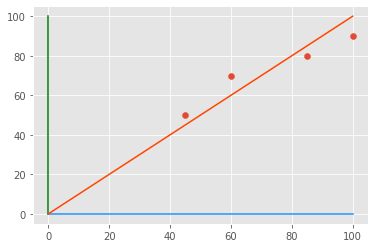

In [63]:
x_col = D2[:,0]
y_col = D2[:,1]
plt.scatter(x_col,y_col)

# w1=0, w2=1
# y=0 일때
plt.plot([0,0],[0,100],'g')

# w1=1, w2=0
# y=0 일때
plt.plot([0,100],[0,0],'dodgerblue')

# w1=1,w2=1
# y =(1/1)x -> y=x
plt.plot([0,100],[0,100],'orangered')
plt.show()

---
## **실습**
---


### **매니폴드 학습**

`sklearn` 라이브러리를 을 이용해 매니폴드 학습을 진행해봅니다.

```
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D
```

In [64]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

#### **Data**

* 데이터 불러오기

In [69]:
X,Y =datasets.make_swiss_roll(n_samples=2000)
print(X[0],X.shape)
print(Y[0],Y.shape)

[10.79440603  2.09848089  7.55773642] (2000, 3)
13.177199297010658 (2000,)


* 데이터 시각화

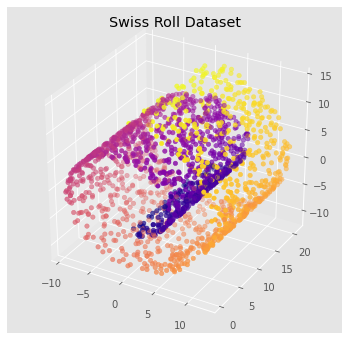

In [78]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection="3d")
x= X[:,0]
y= X[:,1]
z= X[:,2]
ax.scatter(x,y,z, c=Y,cmap='plasma')
plt.title("Swiss Roll Dataset")
plt.show()

#### **알고리즘: Locally Linear Embedding (LLE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html?highlight=lle

* 알고리즘 소개
  * 비지도 학습에 해당하며 차원축소 기법 중 투영이 아닌 매니폴드 학습
  * 입력 데이터셋을 낮은 차원의 좌표계로 매핑하는 알고리즘


* manifold 학습

In [79]:
Z, error = manifold.locally_linear_embedding(X, n_neighbors=12,n_components=2)
print(Z.shape)

(2000, 2)


* 결과 시각화

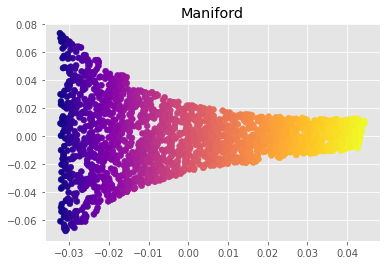

In [80]:
x = Z[:,0]
y = Z[:,1]
plt.scatter(x,y, c=Y,cmap='plasma')
plt.title("Maniford")
plt.show()

## **과제**

---
### **과제 01**
---
1. 스위스롤 데이터에 다양한 `manifold` 알고리즘을 사용하고 시각화 하세요
2. 각 알고리즘에 대해 간략하게 정보를 정리하세요

#### **Multi-Dimensional Scaling (MDS)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS

* 알고리즘 사용 및 시각화

[ 5.92662568 16.93587374 -1.29927577] (500, 3)
6.067372531893209 (500,)


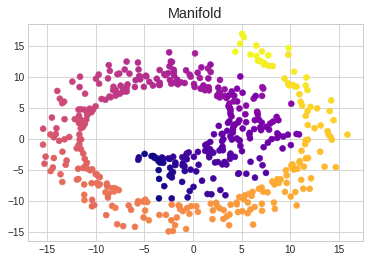

In [140]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

mds = manifold.MDS(n_components=2)
Z = mds.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .다차원 척도법
  * .개체들 사이의 유사성/비유사성을 측정하여 2차원 또는 3차원 공간상에 점으로 표현하는 분석방법.
  * .개체들간의 근접성을 시각화하여 데이터 속에 잠재해 있는 패턴이나 구조를 찾아내는 통계 기법.
  * .개체들간의 거리 계산은 유클리드  거리 행렬을 사용한다
  * . 상대적 거리의 정확도를 높이기 위해 적합한 정도를 스트레스값(stress value)로 나타낸다

#### **t-Stochastic Neighbor Embedding (t-SNE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE

[  3.14623983  11.59595617 -10.8305583 ] (500, 3)
11.278289678865141 (500,)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


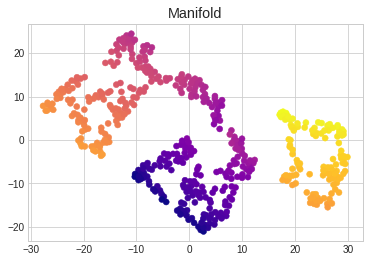

In [141]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
Z = tsne.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* 알고리즘 사용 및 시각화

* **알고리즘 소개**
  * .t-분포 확률적 임베딩
  * .데이터 차원 축소에 사용되는 기계 학습 알고리즘 중 하나
  * .비선형 차원 축소 기법으로, 고차원 데이터를 2,3차원 등으로 줄여 가시화하는 데 유용
  * .구체적으로 비슷한 데이터는 2,3차원의 지엄으로 , 다른 데이터는 멀리 떨어진 지저으로 맵핑한다.
  * .t-SNE 알고리즘은 두 단계에 걸쳐서 진행된다. 첫번째로, 각 데이터 쌍에 대해서 결합분포를 만든다. 이 분포는 비슷한 데이터는 선택될 확률이 매우 높지만 다른 데이터끼리는 선택될 확률이 매우 낮도록 설계된다
  * .t-SNE는 컴퓨터 보안, 음악 분석, 암 연구, 생물정보학, 생체신호처리 등 너른 분야에서 데이터의 시각화를 위해 사용된다.인공 신경망의 상위 계층을 표현하는데 쓰이기도 한다.

#### **ISOMAP**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html?highlight=isomap#sklearn.manifold.Isomap

* 알고리즘 사용 및 시각화

[11.38719027  7.49493858  6.43755309] (500, 3)
13.080909450961649 (500,)


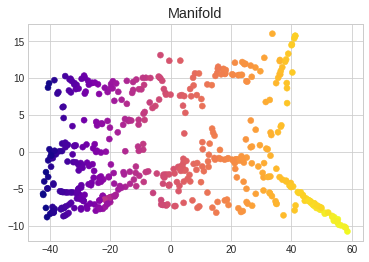

In [142]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

iso = manifold.Isomap(n_components=2)
Z = iso.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .ISOMAP은 비선형 차원 축소 방법입니다. 
  * .널리 사용되는 몇 가지 저 차원 임베딩 방법 중 하나입니다. 
  * .ISOMAP은 일련의 고차원 데이터 포인트의 준 등방성, 저 차원 임베딩을 계산하는 데 사용됩니다.

---
### **과제 02**
---

스위스롤 데이터가 아닌 S커브 데이터 `make_s_curve()`를 이용해 `manifold`를 수행 해 보세요

[-0.35189028  0.39830381  0.06395875] (2000, 3)
-0.35958978388416685 (2000,)


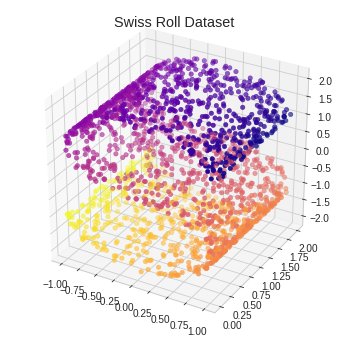

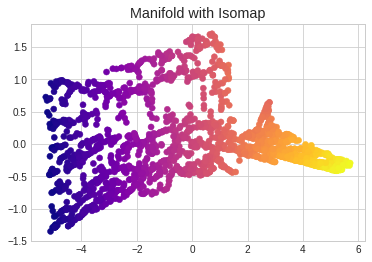

In [143]:
X,Y =datasets.make_s_curve(n_samples=2000)
print(X[0],X.shape)
print(Y[0],Y.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection="3d")
x= X[:,0]
y= X[:,1]
z= X[:,2]
ax.scatter(x,y,z, c=Y,cmap='plasma')
plt.title("Swiss Roll Dataset")
plt.show()

iso = manifold.Isomap(n_components=2)
Z = iso.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold with Isomap")
plt.show()

---
### **과제 03**
---

다음 데이터셋 중 하나를 선택해 불러옵니다.
* 펭귄 데이터
* 와인 데이터
* 축구 예측 데이터

간단한 전처리 후 LLE를 이용해 2차원으로 차원축소하고 시각화 하세요. LLE를 사용하기 위해서는 데이터프레임 형식을 넘파이 배열로 바꿔줘야 하는 것에 주의하세요

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
from google.colab import files
files.upload()

Saving bike_sharing_train.csv to bike_sharing_train.csv


{'bike_sharing_train.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.

In [167]:
def preproces_bike(df):
  #필요없는 속성제거
  drop_list = ['casual','registered']
  df_pre = df.drop(drop_list,axis=1)

  #결측값 중앙값으로 처리
  mask_wind =  df_pre['windspeed'] == 0.0
  df_pre.loc[mask_wind,'windspeed'] = df_pre['windspeed'].median()

  #날짜를 제거하고 시간만 남기는 처리
  for i in range(len(df_pre['datetime'])):
    if len(df_pre['datetime'][i])> 4:
      (df_pre['datetime'][i])=int(df_pre['datetime'][i][-8:-6])

  #이산화 -시간별로 구간을 만드는 처리(0-4시:0 / 4-8시:1 / 8-12시:2 / 12-16시:3 /16-20시:4 /20-24:5)
  bin = [-1,4,8,12,16,20,25]
  group_name = [0,1,2,3,4,5]
  df_pre['datetime']=pd.cut(df_pre['datetime'], bins=bin, labels=group_name)

  return df_pre

In [169]:
df_train =pd.read_csv("bike_sharing_train.csv")
train=preproces_bike(df_train)
train.head()
X=train.drop('count',axis=1)
X_np=X.to_numpy()
Y=train['count']
Y_np=Y.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [171]:
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,0,1,0,0,1,9.84,14.395,81,12.9980
1,0,1,0,0,1,9.02,13.635,80,12.9980
2,0,1,0,0,1,9.02,13.635,80,12.9980
3,0,1,0,0,1,9.84,14.395,75,12.9980
4,0,1,0,0,1,9.84,14.395,75,12.9980
...,...,...,...,...,...,...,...,...,...
10881,4,4,0,1,1,15.58,19.695,50,26.0027
10882,4,4,0,1,1,14.76,17.425,57,15.0013
10883,5,4,0,1,1,13.94,15.910,61,15.0013
10884,5,4,0,1,1,13.94,17.425,61,6.0032


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


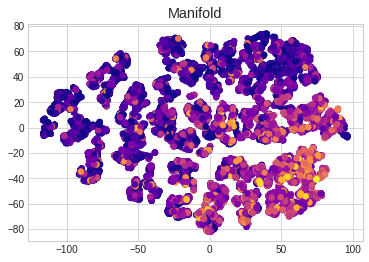

In [172]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
Z = tsne.fit_transform(X_np)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y_np, cmap='plasma')
plt.title("Manifold")
plt.show()

연습

In [151]:
files.upload()

Saving FIFA_train.csv to FIFA_train.csv


{'FIFA_train.csv': b'id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value\r\n0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0\r\n3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0\r\n7,L. Su\xc3\xa1rez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0\r\n8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0\r\n9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0\r\n12,D. God\xc3\xadn,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0\r\n13,David Silva,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0\r\n14,N. Kant\xc3\xa9,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0\r\n18,M. ter Stegen,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0\r\n19,T. Courtois,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0\r\n20,Sergio Busquets,29,europe,2023,MF,right,4.0,89,89,3.0,51500000.0\r\n21,E. Cavani,31,south america,2020,ST,right,4.0,89,89,3.0,60000000.0\r\n22,M. Neuer,32,europe,20

In [173]:
def preproces_FIFA(df):
  #필요없는 속성 제거
  drop_list = ['id','name']
  df_pre = df.drop(drop_list,axis=1)
  #결측값 없음
  #이상치 제거
  for i in range(len(df_pre['contract_until'])):
    if len(df_pre['contract_until'][i])> 4:
      (df_pre['contract_until'][i])=df_pre['contract_until'][i][-4:]
    (df_pre['contract_until'][i])=int(df_pre['contract_until'][i])-2018
  #데이터 변환
  mask_s = df_pre["continent"] =='south america'
  mask_e = df_pre["continent"] =='europe'
  mask_af = df_pre["continent"] =='africa'
  mask_as = df_pre["continent"] =='asia'
  mask_o = df_pre["continent"] =='oceania'
  df_pre.loc[mask_s, "continent"] =0
  df_pre.loc[mask_e, "continent"] =1
  df_pre.loc[mask_af, "continent"] =2
  df_pre.loc[mask_as, "continent"] =3
  df_pre.loc[mask_o, "continent"] =4

  mask_sf = df_pre["position"] =='ST'
  mask_gf = df_pre["position"] =='GK'
  mask_df = df_pre["position"] =='DF'
  mask_mf = df_pre["position"] =='MF'
  df_pre.loc[mask_sf, "position"] =0
  df_pre.loc[mask_gf, "position"] =1
  df_pre.loc[mask_df, "position"] =2
  df_pre.loc[mask_mf, "position"] =3

  mask_r = df_pre["prefer_foot"] =='right'
  mask_l = df_pre["prefer_foot"] =='left'
  df_pre.loc[mask_r, "prefer_foot"] =0
  df_pre.loc[mask_l, "prefer_foot"] =1
  #이산화 하지 않음
  #정규화 하지 않음
  return df_pre

In [174]:
df_train =pd.read_csv("FIFA_train.csv")
train=preproces_FIFA(df_train)
X=train.drop('value',axis=1)
X_np=X.to_numpy()
Y=train['value']
Y_np=Y.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


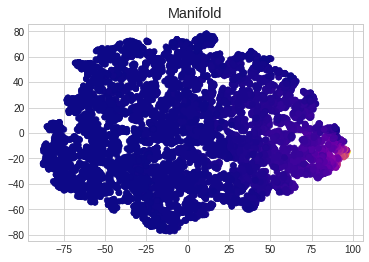

In [175]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
Z = tsne.fit_transform(X_np)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y_np, cmap='plasma')
plt.title("Manifold")
plt.show()